# HAPUARACHCHI HADND - 220212A


#### 1 .Import required libraries and Iris dataset

In [127]:
import sklearn.datasets as ds
import sklearn.linear_model as lm
import sklearn.preprocessing as pre
import sklearn.model_selection as ms
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wine dataset
wine = ds.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

print(f"Dataset shape: {df.shape}")
print("")
print(df.head(10))

Dataset shape: (178, 13)

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0
5    14.20        1.76  2.45  ...  1.05                          2.85   1450.0
6    14.39        1.87  2.45  ...  1.02                          3.58   1290.0
7    14.06        2.15  2.61  ...  1.06                          3.58   1295.0
8    14.83        1.64  2.17  ...  1.08                          2.85   1045.0
9    13.86        1.35  2.27  ...  1.01                          3.55   1045.0

[10 rows x 13 columns]


#### 2. Print the feature names, target variable (if applicable), and any relevant information about the dataset.

In [128]:
print("Feature names:\n", *wine.feature_names, sep='\n')
print("")
print("Target variable:", wine.target_names)
print("Number of samples:", len(df))
print("Number of features:", df.shape[1])

Feature names:

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline

Target variable: ['class_0' 'class_1' 'class_2']
Number of samples: 178
Number of features: 13


#### 3. Select the features: Choose a subset of features (e.g., say two features) from the dataset for the normalization comparison. [Hint: See the mean, variance, 1st quartile(25th quantile) and the 3rd quartile (75th quantile) of the features and select features that may contain outliers.]


In [129]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### <i>Selecting two features</i>

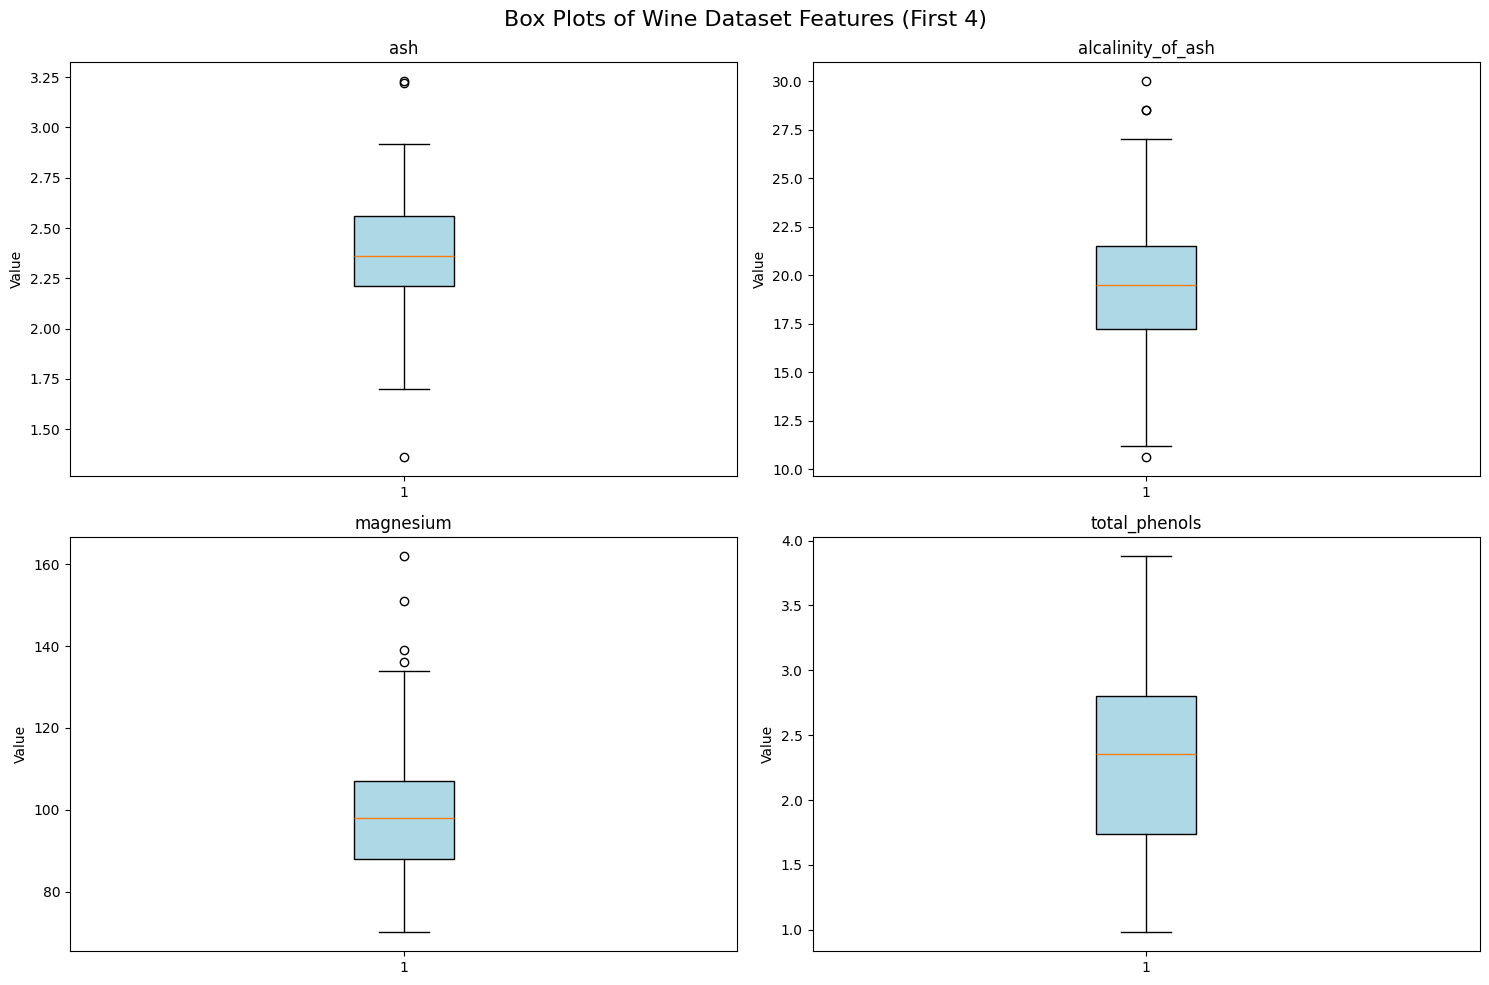

Outlier Analysis for Wine Dataset:
25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64
ash: 3 outliers
59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64
alcalinity_of_ash: 4 outliers
69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64
magnesium: 4 outliers
Series([], Name: total_phenols, dtype: float64)
total_phenols: 0 outliers

Note: 'total_phenols' has the most outliers - good for scaling demonstration!


In [130]:
# Create box plots for first 4 features to identify outliers
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots of Wine Dataset Features (First 4)', fontsize=16)

# Flatten the axs array for easy iteration
axs = axs.ravel()

# Select first 4 features for visualization
features_to_plot = df.columns[2:6]

# Create a box plot for each feature
for i, feature in enumerate(features_to_plot):
    axs[i].boxplot(df[feature], patch_artist=True, 
                   boxprops=dict(facecolor='lightblue'))
    axs[i].set_title(feature)
    axs[i].set_ylabel('Value')
    
    # Count outliers for each feature
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)]

plt.tight_layout()
plt.show()

# Print detailed outlier analysis
print("Outlier Analysis for Wine Dataset:")
print("=" * 50)

for feature in features_to_plot:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(outliers)
    print(f"{feature}: {len(outliers)} outliers")
print("\nNote: 'total_phenols' has the most outliers - good for scaling demonstration!")

#### <i>Selected 'total_phenols' (has outliers) and 'alcohol' (different scale) for normalization comparison</i>

<b>Min-Max Scaling</b>

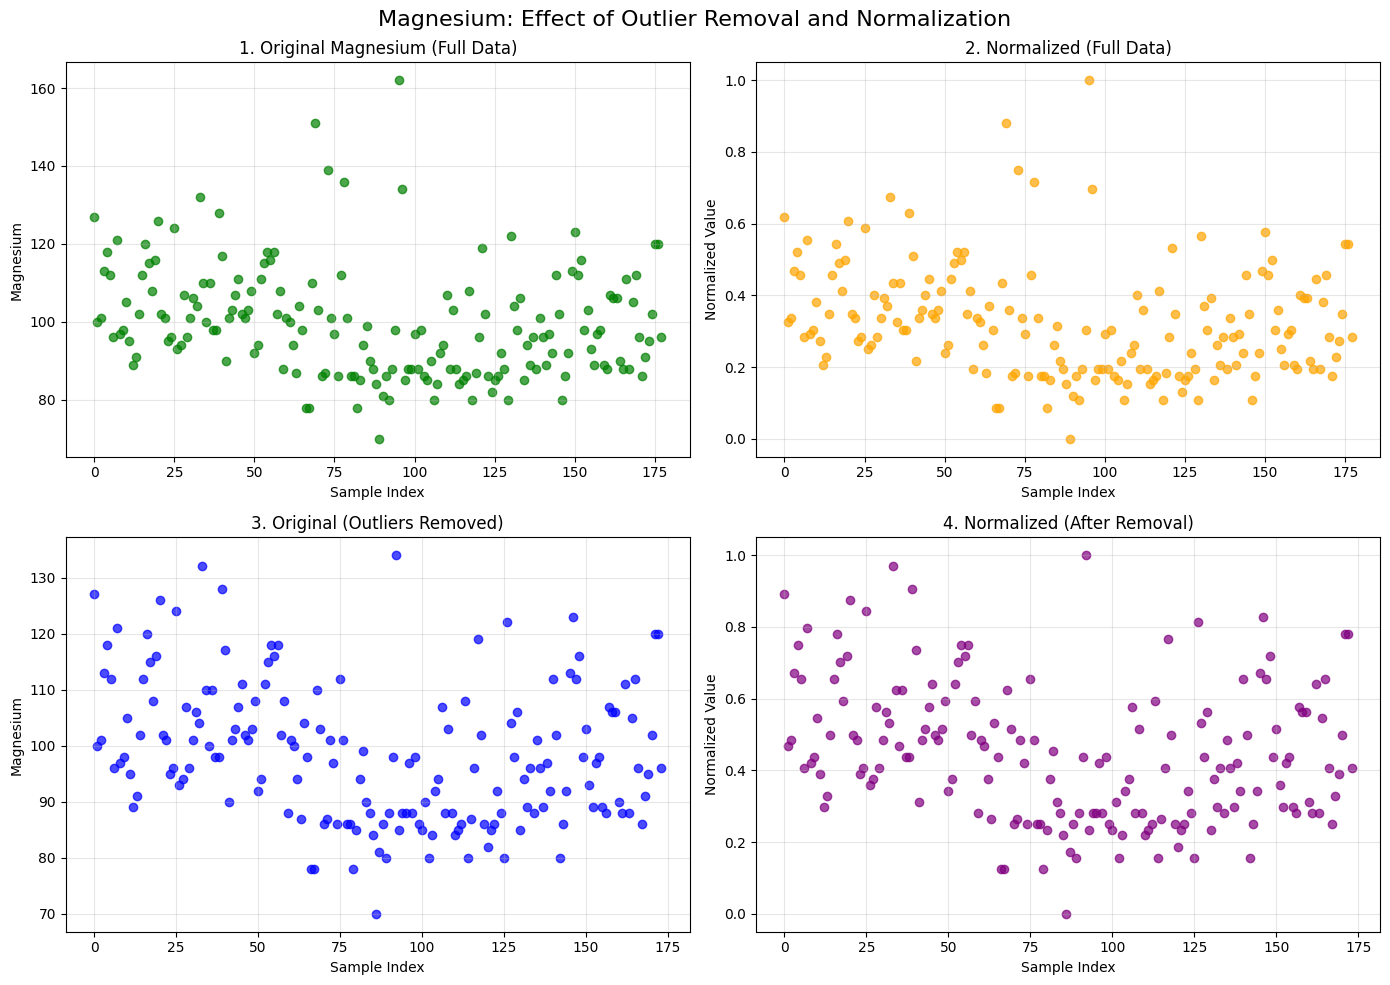

In [133]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assume: df is your DataFrame
mag = df['magnesium']

outlier_indices = [69, 73, 78, 95]

# Initialize Min-Max scaler
scaler = MinMaxScaler()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Magnesium: Effect of Outlier Removal and Normalization', fontsize=16)

# Plot 1: Original (Full Data)
axs[0, 0].scatter(range(len(mag)), mag, alpha=0.7, color='green')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Magnesium')
axs[0, 0].set_title('1. Original Magnesium (Full Data)')
axs[0, 0].grid(True, alpha=0.3)

# Plot 2: Normalized (Full Data)
mag_norm_full = scaler.fit_transform(mag.values.reshape(-1, 1))
axs[0, 1].scatter(range(len(mag_norm_full)), mag_norm_full, alpha=0.7, color='orange')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Normalized Value')
axs[0, 1].set_title('2. Normalized (Full Data)')
axs[0, 1].grid(True, alpha=0.3)

# Plot 3: Original (Outliers Removed)
mag_clean = mag.drop(index=outlier_indices)
axs[1, 0].scatter(range(len(mag_clean)), mag_clean, alpha=0.7, color='blue')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnesium')
axs[1, 0].set_title('3. Original (Outliers Removed)')
axs[1, 0].grid(True, alpha=0.3)

# Plot 4: Normalized (After Removal)
mag_norm_clean = scaler.fit_transform(mag_clean.values.reshape(-1, 1))
axs[1, 1].scatter(range(len(mag_norm_clean)), mag_norm_clean, alpha=0.7, color='purple')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Normalized Value')
axs[1, 1].set_title('4. Normalized (After Removal)')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Standard Scaling</b>

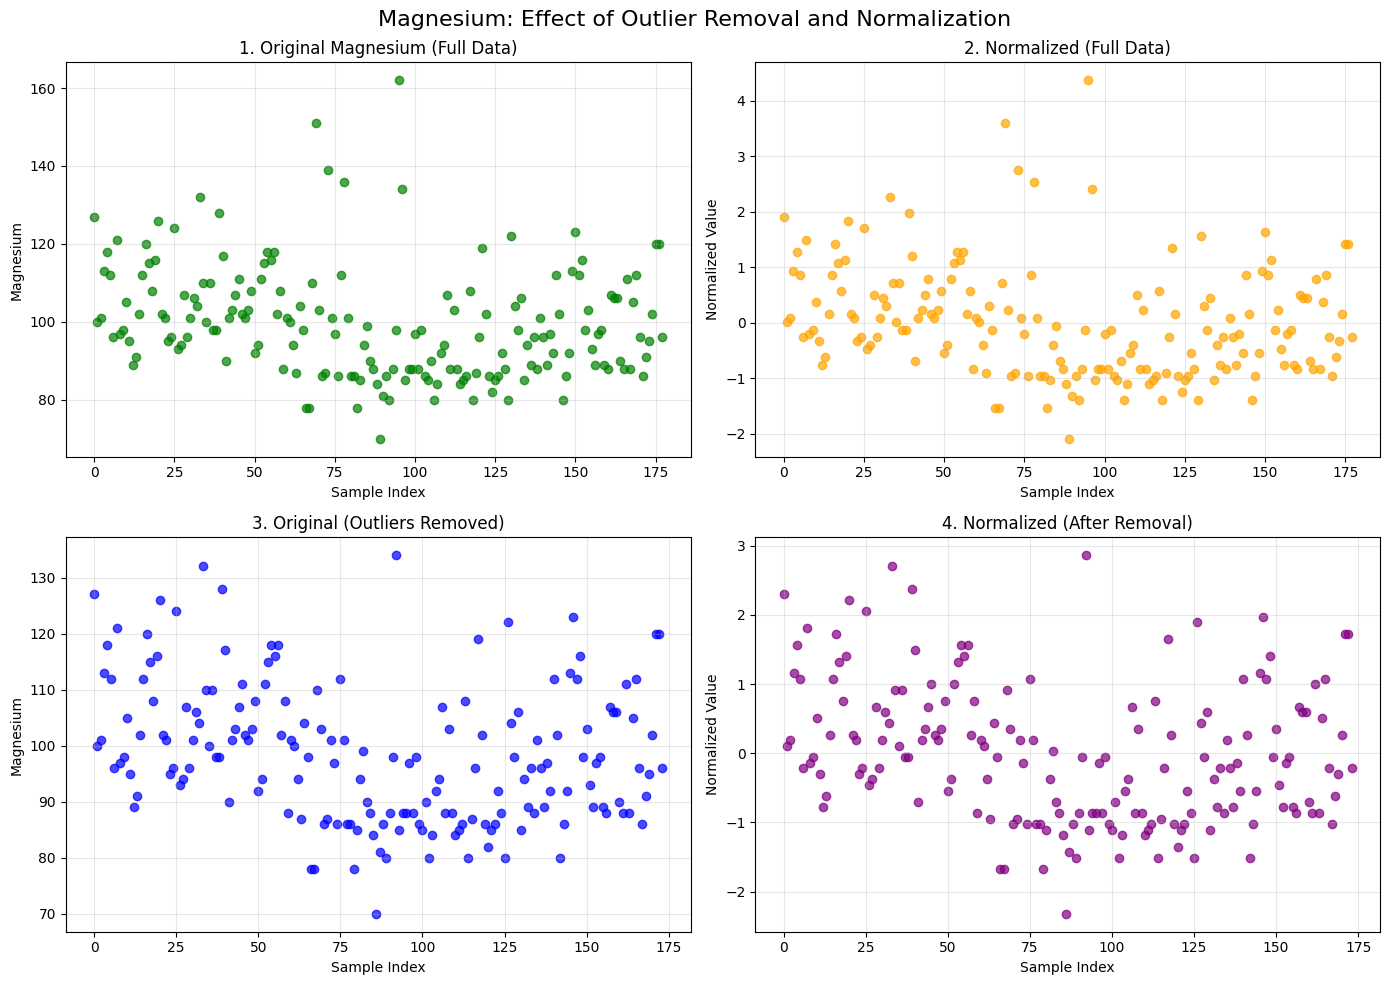

In [135]:
mag = df['magnesium']

outlier_indices = [69, 73, 78, 95]

# Initialize Min-Max scaler
scaler = pre.StandardScaler()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Magnesium: Effect of Outlier Removal and Normalization', fontsize=16)

# Plot 1: Original (Full Data)
axs[0, 0].scatter(range(len(mag)), mag, alpha=0.7, color='green')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Magnesium')
axs[0, 0].set_title('1. Original Magnesium (Full Data)')
axs[0, 0].grid(True, alpha=0.3)

# Plot 2: Normalized (Full Data)
mag_norm_full = scaler.fit_transform(mag.values.reshape(-1, 1))
axs[0, 1].scatter(range(len(mag_norm_full)), mag_norm_full, alpha=0.7, color='orange')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Normalized Value')
axs[0, 1].set_title('2. Normalized (Full Data)')
axs[0, 1].grid(True, alpha=0.3)

# Plot 3: Original (Outliers Removed)
mag_clean = mag.drop(index=outlier_indices)
axs[1, 0].scatter(range(len(mag_clean)), mag_clean, alpha=0.7, color='blue')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnesium')
axs[1, 0].set_title('3. Original (Outliers Removed)')
axs[1, 0].grid(True, alpha=0.3)

# Plot 4: Normalized (After Removal)
mag_norm_clean = scaler.fit_transform(mag_clean.values.reshape(-1, 1))
axs[1, 1].scatter(range(len(mag_norm_clean)), mag_norm_clean, alpha=0.7, color='purple')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Normalized Value')
axs[1, 1].set_title('4. Normalized (After Removal)')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Robust Scaling</b>

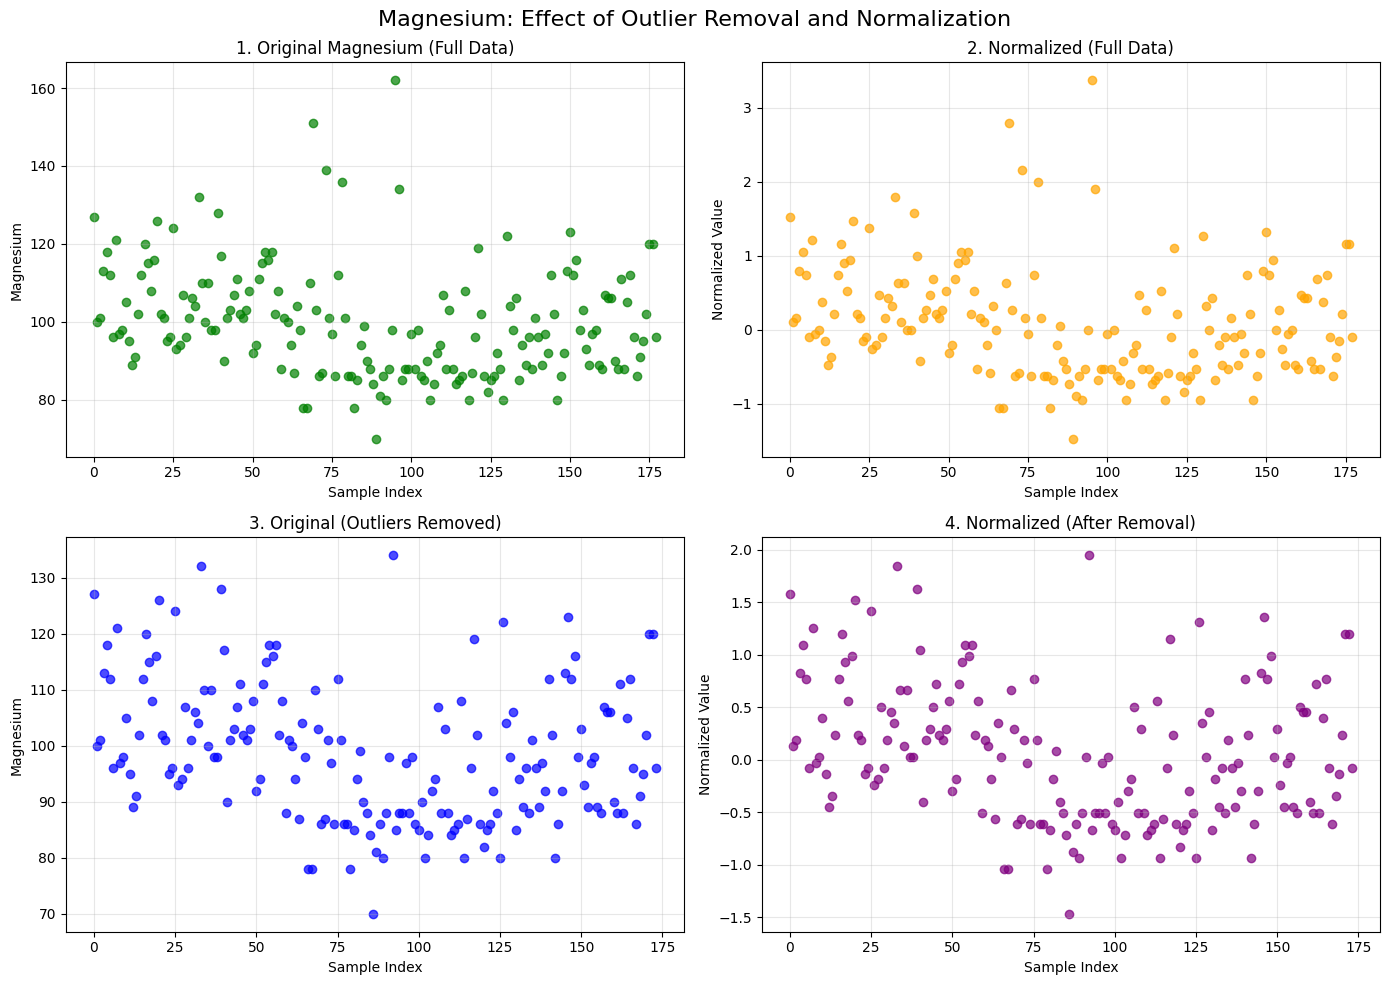

In [134]:
mag = df['magnesium']

outlier_indices = [69, 73, 78, 95]

# Initialize Min-Max scaler
scaler = pre.RobustScaler()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Magnesium: Effect of Outlier Removal and Normalization', fontsize=16)

# Plot 1: Original (Full Data)
axs[0, 0].scatter(range(len(mag)), mag, alpha=0.7, color='green')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Magnesium')
axs[0, 0].set_title('1. Original Magnesium (Full Data)')
axs[0, 0].grid(True, alpha=0.3)

# Plot 2: Normalized (Full Data)
mag_norm_full = scaler.fit_transform(mag.values.reshape(-1, 1))
axs[0, 1].scatter(range(len(mag_norm_full)), mag_norm_full, alpha=0.7, color='orange')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Normalized Value')
axs[0, 1].set_title('2. Normalized (Full Data)')
axs[0, 1].grid(True, alpha=0.3)

# Plot 3: Original (Outliers Removed)
mag_clean = mag.drop(index=outlier_indices)
axs[1, 0].scatter(range(len(mag_clean)), mag_clean, alpha=0.7, color='blue')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnesium')
axs[1, 0].set_title('3. Original (Outliers Removed)')
axs[1, 0].grid(True, alpha=0.3)

# Plot 4: Normalized (After Removal)
mag_norm_clean = scaler.fit_transform(mag_clean.values.reshape(-1, 1))
axs[1, 1].scatter(range(len(mag_norm_clean)), mag_norm_clean, alpha=0.7, color='purple')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Normalized Value')
axs[1, 1].set_title('4. Normalized (After Removal)')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Power Transformer</b>

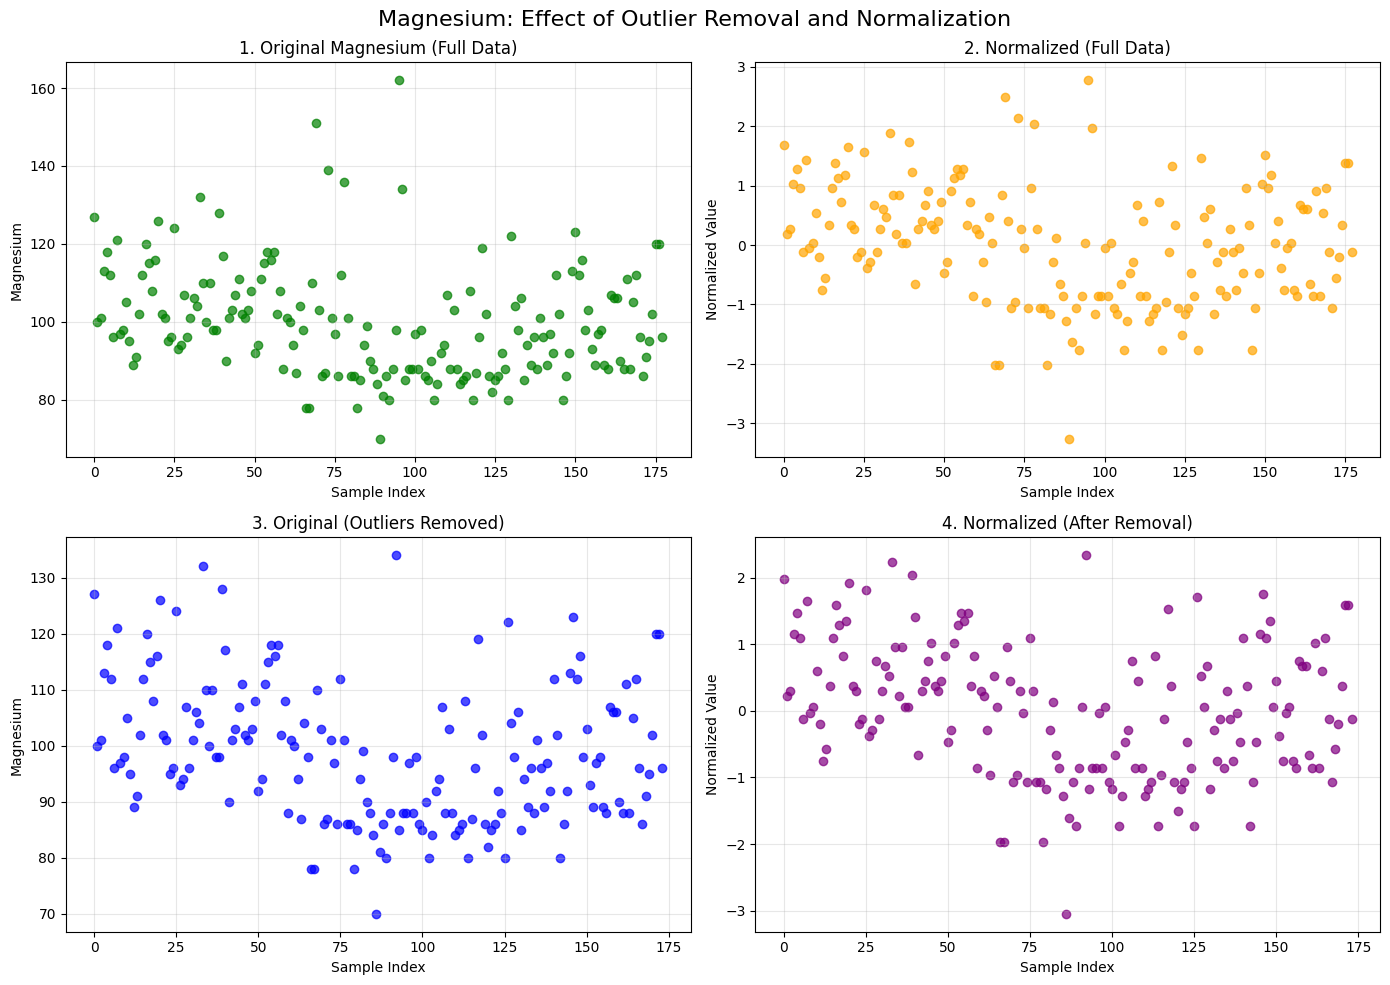

In [136]:
mag = df['magnesium']

outlier_indices = [69, 73, 78, 95]

# Initialize Min-Max scaler
scaler = pre.PowerTransformer()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Magnesium: Effect of Outlier Removal and Normalization', fontsize=16)

# Plot 1: Original (Full Data)
axs[0, 0].scatter(range(len(mag)), mag, alpha=0.7, color='green')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Magnesium')
axs[0, 0].set_title('1. Original Magnesium (Full Data)')
axs[0, 0].grid(True, alpha=0.3)

# Plot 2: Normalized (Full Data)
mag_norm_full = scaler.fit_transform(mag.values.reshape(-1, 1))
axs[0, 1].scatter(range(len(mag_norm_full)), mag_norm_full, alpha=0.7, color='orange')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Normalized Value')
axs[0, 1].set_title('2. Normalized (Full Data)')
axs[0, 1].grid(True, alpha=0.3)

# Plot 3: Original (Outliers Removed)
mag_clean = mag.drop(index=outlier_indices)
axs[1, 0].scatter(range(len(mag_clean)), mag_clean, alpha=0.7, color='blue')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnesium')
axs[1, 0].set_title('3. Original (Outliers Removed)')
axs[1, 0].grid(True, alpha=0.3)

# Plot 4: Normalized (After Removal)
mag_norm_clean = scaler.fit_transform(mag_clean.values.reshape(-1, 1))
axs[1, 1].scatter(range(len(mag_norm_clean)), mag_norm_clean, alpha=0.7, color='purple')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Normalized Value')
axs[1, 1].set_title('4. Normalized (After Removal)')
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [137]:
print("• For outlier-heavy data: Use RobustScaler")
print("• For normal distribution: Use StandardScaler") 
print("• For bounded features: Use MinMaxScaler (after outlier removal)")
print("• For skewed data: Use PowerTransformer")

• For outlier-heavy data: Use RobustScaler
• For normal distribution: Use StandardScaler
• For bounded features: Use MinMaxScaler (after outlier removal)
• For skewed data: Use PowerTransformer
